# The notebook was created with the purpose of getting acquainted with distributions in mathematical statistics. We will work with various packages for data analysis and visualization.

## Content:

### 1. Importing necessary libraries

### 2. 

### 3. 

### 4. 

### 5.

In [51]:
import numpy as np
import scipy.stats as sts 
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm_notebook
import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default = 'seaborn'
plt.style.use('seaborn-v0_8-pastel')
sns.set_theme(style="darkgrid")

# Discrete Distributions: Formulas and Properties

## Table of Contents
- [Bernoulli Distribution](##-1.-Bernoulli-Distribution)
- [Binomial Distribution](##-2.-Binomial-Distribution)
- [Geometric Distribution](##-3.-Geometric-Distribution)
- [Negative Binomial Distribution (Pascal Distribution)](##-4.-Negative-Binomial-Distribution-Pascal-Distribution)
- [Hypergeometric Distribution](##-5.-Hypergeometric-Distribution)
- [Poisson Distribution](##-6.-Poisson-Distribution)

---

## 1. Bernoulli Distribution

### Probability Mass Function (PMF)
$ P(X = x) = p^x (1 - p)^{1 - x}, \quad x \in \{0, 1\}, \quad 0 \leq p \leq 1 $

### Mean
$ E[X] = p $

### Variance
$ \text{Var}(X) = p(1 - p) $


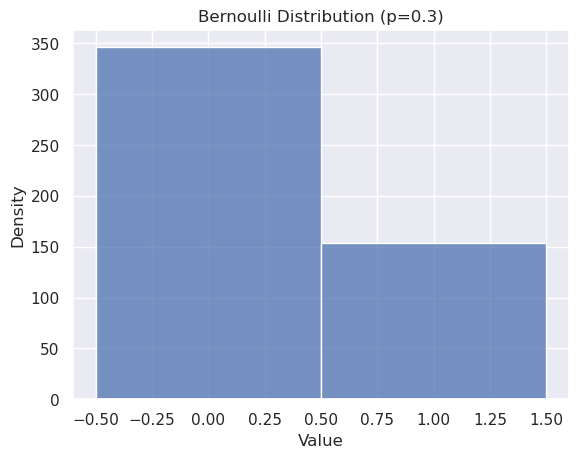

In [52]:
p = 0.3
bernoulli_sample = sts.bernoulli.rvs(p, size=500)

sns.histplot(bernoulli_sample, discrete=True, kde=False)
plt.title(f"Bernoulli Distribution (p={p})")
plt.xlabel("Value")
plt.ylabel("Density");

In [53]:
p_values = [0.1, 0.3, 0.5, 0.7, 0.9]
bernoulli_fig = go.Figure()
for p in p_values:
    bernoulli_fig.add_trace(
        go.Bar(x=[0, 1], y=sts.bernoulli.pmf([0, 1], p), name=f"p={p}")
        )
bernoulli_fig.update_layout(title="Bernoulli Distribution", xaxis_title="Value", yaxis_title="PMF", barmode="group")


---

## 2. Binomial Distribution

### Probability Mass Function (PMF)
$ P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}, \quad k \in \{0, 1, \dots, n\}, \quad 0 \leq p \leq 1 $

### Mean
$ E[X] = n \cdot p $

### Variance
$ \text{Var}(X) = n \cdot p \cdot (1 - p) $


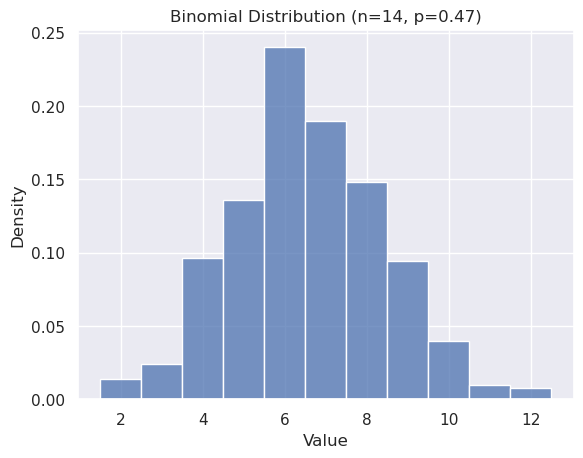

In [54]:
n, p = 14, 0.47
binom_sample = sts.binom.rvs(n, p, size=500)
sns.histplot(binom_sample, discrete=True, kde=False, stat="density")
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.xlabel("Value")
plt.ylabel("Density");

In [55]:
n = 70 
binomial_fig = go.Figure()
x = np.arange(0, n + 1)
for p in [0.2, 0.4, 0.6, 0.8]:
    binomial_fig.add_trace(
        go.Bar(x=x, y=sts.binom.pmf(x, n, p), name=f"p={p}")
        )
binomial_fig.update_layout(title="Binomial Distribution", xaxis_title="Value", yaxis_title="PMF", barmode="group")

---

## 3. Geometric Distribution

### Probability Mass Function (PMF)
$ P(X = k) = (1 - p)^{k - 1} p, \quad k \geq 1, \quad 0 < p \leq 1 $

### Mean
$ E[X] = \frac{1}{p} $

### Variance
$ \text{Var}(X) = \frac{1 - p}{p^2} $


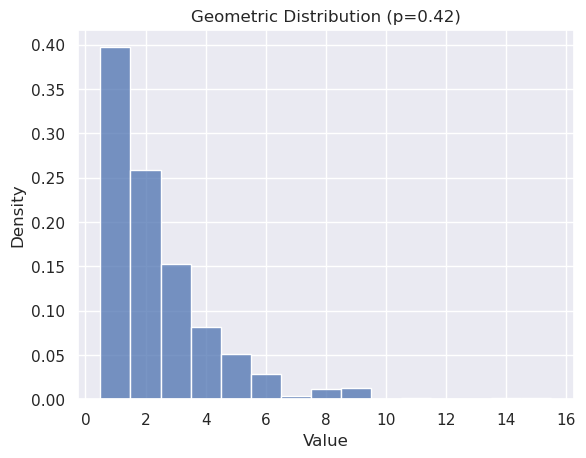

In [56]:
p = 0.42
geom_sample = sts.geom.rvs(p, size=1000)
sns.histplot(geom_sample, discrete=True, kde=False, stat="density")
plt.title(f"Geometric Distribution (p={p})")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [57]:
geom_fig = go.Figure()
x = np.arange(1, 20)
for p in [0.2, 0.4, 0.6, 0.8]:
    geom_fig.add_trace(
        go.Bar(x=x, y=sts.geom.pmf(x, p), name=f"p={p}")
        )
geom_fig.update_layout(title="Geometric Distribution", xaxis_title="Value", yaxis_title="PMF", barmode="group")

---

## 4. Negative Binomial Distribution (Pascal Distribution)

### Probability Mass Function (PMF)
$ P(X = k) = \binom{k + r - 1}{r - 1} p^r (1 - p)^k, \quad k \geq 0, \quad 0 < p \leq 1 $

### Mean
$ E[X] = r \cdot \frac{1 - p}{p} $

### Variance
$ \text{Var}(X) = r \cdot \frac{1 - p}{p^2} $


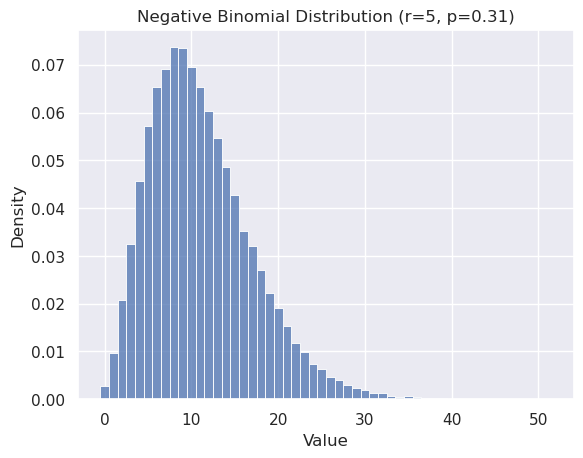

In [58]:
r, p = 5, 0.31
nbinom_sample = sts.nbinom.rvs(r, p, size=50000)
sns.histplot(nbinom_sample, discrete=True, kde=False, stat="density")
plt.title(f"Negative Binomial Distribution (r={r}, p={p})")
plt.xlabel("Value")
plt.ylabel("Density");

In [59]:
nbinom_fig = go.Figure()
x = np.arange(0, 40)
for r, p in [(5, 0.2), (6, 0.4), (7, 0.6), (5, 0.8)]:
    nbinom_fig.add_trace(
        go.Bar(x=x, y=sts.nbinom.pmf(x, r, p), name=f"r={r}, p={p}")
        )
nbinom_fig.update_layout(title="Negative Binomial Distribution", xaxis_title="Value", yaxis_title="PMF", barmode="group")

---

## 5. Hypergeometric Distribution

### Probability Mass Function (PMF)
$ P(X = k) = \frac{\binom{n}{k} \binom{N - n}{K - k}}{\binom{N}{K}}, \quad \max(0, K + n - N) \leq k \leq \min(n, K) $

### Mean
$ E[X] = n \cdot \frac{K}{N} $

### Variance
$ \text{Var}(X) = n \cdot \frac{K}{N} \cdot \frac{N - K}{N} \cdot \frac{N - n}{N - 1} $


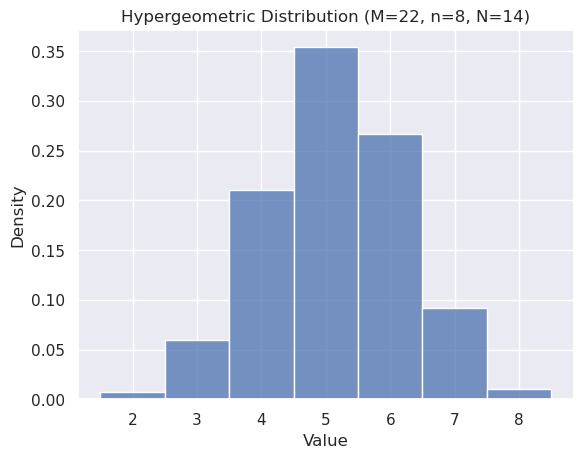

In [60]:
M, n, N = 22, 8, 14
hypergeom_sample = sts.hypergeom.rvs(M, n, N, size=1300)
sns.histplot(hypergeom_sample, discrete=True, kde=False, stat="density")
plt.title(f"Hypergeometric Distribution (M={M}, n={n}, N={N})")
plt.xlabel("Value")
plt.ylabel("Density");

In [61]:
hypergeom_fig = go.Figure()
x = np.arange(0, 13)
M, n = 22, 8
for N in [5, 10, 15]:
    hypergeom_fig.add_trace(
        go.Bar(x=x, y=sts.hypergeom.pmf(x, M, n, N), name=f"N={N}")
        )
hypergeom_fig.update_layout(title="Hypergeometric Distribution", xaxis_title="Value", yaxis_title="PMF", barmode="group")

---

## 6. Poisson Distribution

### Probability Mass Function (PMF)
$ P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k \geq 0, \quad \lambda > 0 $

### Mean
$ E[X] = \lambda $

### Variance
$ \text{Var}(X) = \lambda $


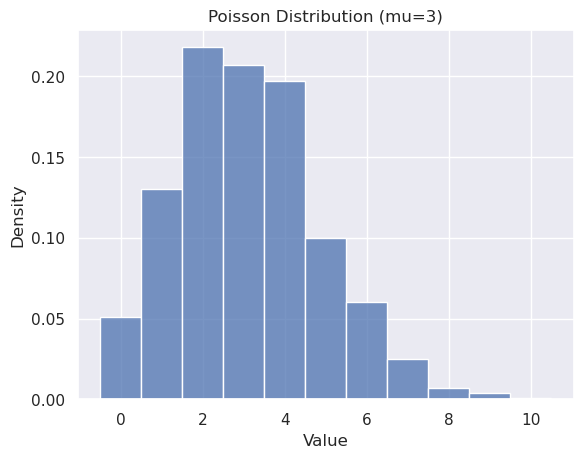

In [62]:
mu = 3
poisson_sample = sts.poisson.rvs(mu, size=1000)
sns.histplot(poisson_sample, discrete=True, kde=False, stat="density")
plt.title(f"Poisson Distribution (mu={mu})")
plt.xlabel("Value")
plt.ylabel("Density");

In [63]:
poisson_fig = go.Figure()
x = np.arange(0, 20)
for mu in [1, 3, 5, 7]:
    poisson_fig.add_trace(
        go.Bar(x=x, y=sts.poisson.pmf(x, mu), name=f"mu={mu}")
        )
poisson_fig.update_layout(title="Poisson Distribution", xaxis_title="Value", yaxis_title="PMF", barmode="group")